# Varun Balle Price Forecasting

# Importing necessary libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from datetime import datetime, timedelta
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
%matplotlib inline
random.seed(42)

# Loading Dataset

In [3]:
import pandas as pd
df = pd.read_csv("Iowa Liquor Sales 2019-2021.csv")

In [4]:
df.head()

,Unnamed: 0,invoice_item_number,date,store_number,store_name,store_address,city,zip_code,store_location,county_number,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,0,INV-16690300025,2019-01-02,4449,KUM & GO #121 / URBANDALE,12041 DOUGLAS PKWY,URBANDALE,50322.0,NaN,77.0,...,37991,SMIRNOFF 80PRF MINI,12,500,7.47,11.21,2,22.42,1.0,0.26
1,1,INV-16677600011,2019-01-02,2478,PRAIRIE MEADOWS,ONE PRAIRIE MEADOWS DRIVE,ALTOONA,50009.0,NaN,77.0,...,44217,BARTON RUM LIGHT,12,1000,4.00,6.00,24,144.00,24.0,6.34
2,2,INV-16702300003,2019-01-02,3705,LIQUOR LOCKER,507 1ST AVE #100,ROCK RAPIDS,51246.0,NaN,60.0,...,11777,BLACK VELVET,12,1000,6.63,9.95,12,119.40,12.0,3.17
3,3,INV-16693100018,2019-01-02,5151,IDA LIQUOR,"500, HWY 175",IDA GROVE,51445.0,NaN,47.0,...,35918,FIVE O'CLOCK VODKA,6,1750,7.20,10.80,6,64.80,10.5,2.77
4,4,INV-16685400057,2019-01-02,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001.0,NaN,31.0,...,46351,HAWKEYE LIGHT RUM,12,1000,4.34,6.51,12,78.12,12.0,3.17


In [7]:
df['sale_dollars'].mean()

153.2577341407182

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165520 entries, 0 to 7165519
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   invoice_item_number  object 
 1   date                 object 
 2   store_number         int64  
 3   store_name           object 
 4   store_address        object 
 5   city                 object 
 6   zip_code             float64
 7   store_location       object 
 8   county_number        float64
 9   county               object 
 10  category             float64
 11  category_name        object 
 12  vendor_number        float64
 13  vendor_name          object 
 14  item_number          int64  
 15  item_description     object 
 16  pack                 int64  
 17  bottle_volume_ml     int64  
 18  state_bottle_cost    float64
 19  state_bottle_retail  float64
 20  bottles_sold         int64  
 21  sale_dollars         float64
 22  volume_sold_liters   float64
 23  volume_sold_gallons  float64
dty

In [13]:
# transforming date column values to datetime object.
df['date'] = pd.to_datetime(df['date'])

# 1.Overall Sales Trends
This section investigates the overall sales trends in your liquor sales data from 2019 to 2021.

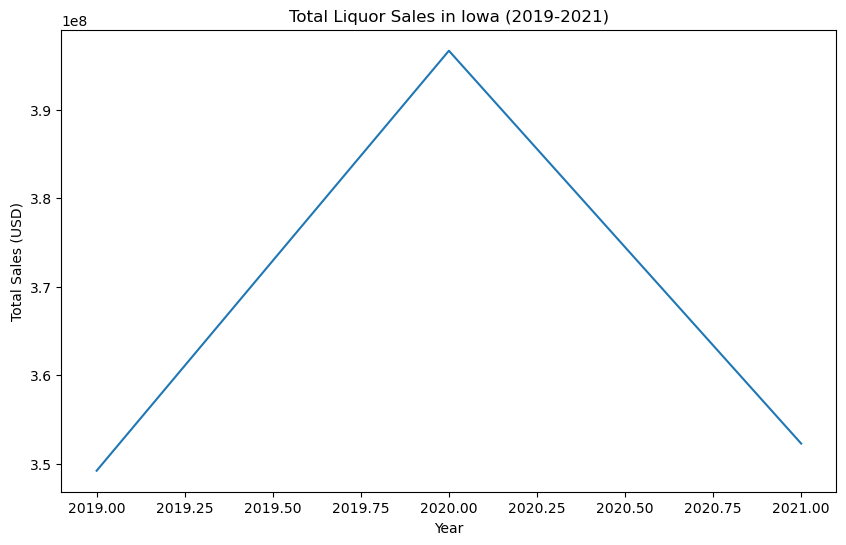

In [16]:
# Assuming "date" is a datetime format
df['Year'] = pd.to_datetime(df['date']).dt.year

# Total Sales by Year
yearly_sales = df.groupby('Year')['sale_dollars'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['sale_dollars'])
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.title('Total Liquor Sales in Iowa (2019-2021)')
plt.show()

## Insights:
- By analyzing the line plot, you can identify patterns in sales ovetime therere is an evident n upward tretyAn upward trenthat d signifies that the liquor sales business is potentially growing and generating more revenue over tim Growth from 2019-2020 was pretty linear where ass it took a sudden bump in 2020 this could be accredited to the COVID-19 pandemic which hindered buyers' ability to purchase and steady incline was seen from 2020 to 2021 s.

# 2 Product and Category Analysis:

### Top Selling Items by Bottles

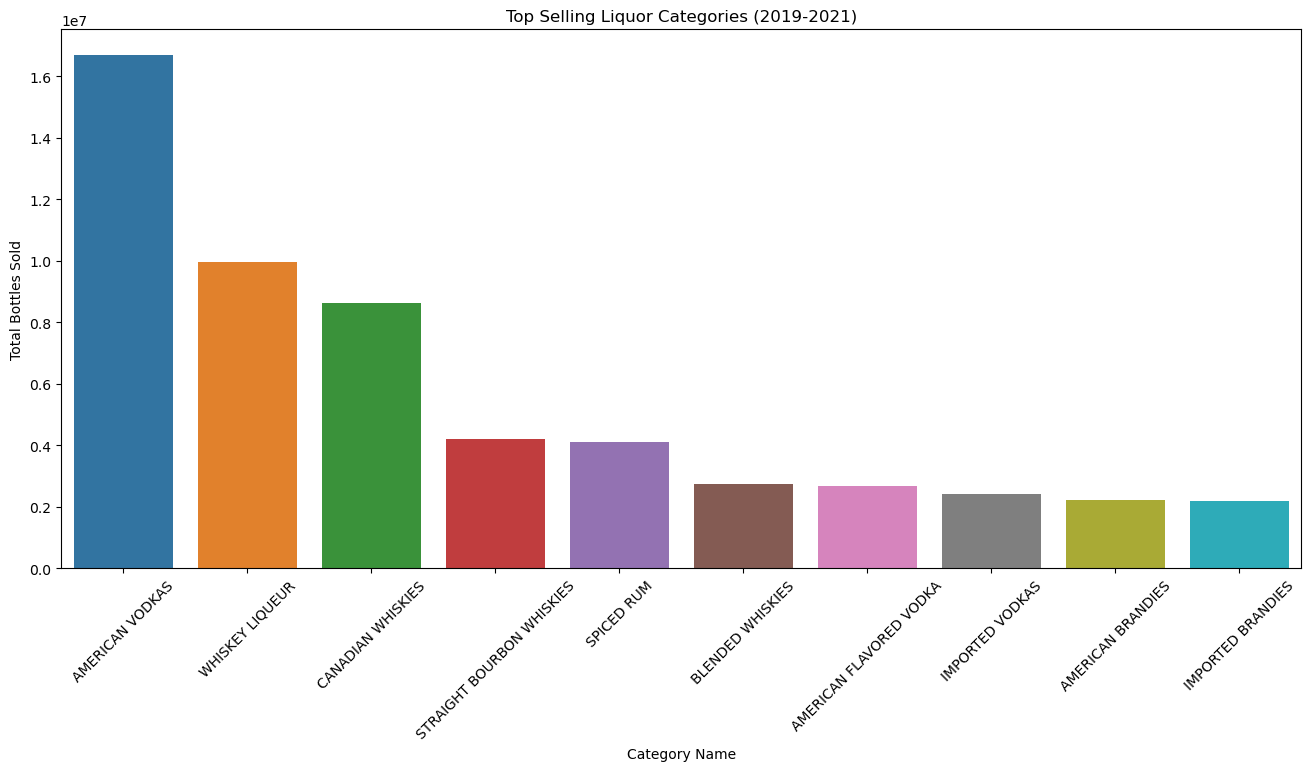

In [17]:
# Top Selling Categories by Bottles Sold
top_categories_sold = df.groupby('category_name')['bottles_sold'].sum().nlargest(10).reset_index()
plt.figure(figsize=(16, 7))
sns.barplot(x='category_name', y='bottles_sold', data=top_categories_sold)
plt.xlabel('Category Name')
plt.ylabel('Total Bottles Sold')
plt.title('Top Selling Liquor Categories (2019-2021)')
plt.xticks(rotation=45)
plt.show()

## Insights
-
From the plot, we can see that American Vodkas were the best selling category with Whiskey Liqueur and Canadian Whiskey Coming in second and third place

### Top Selling Items by Sales

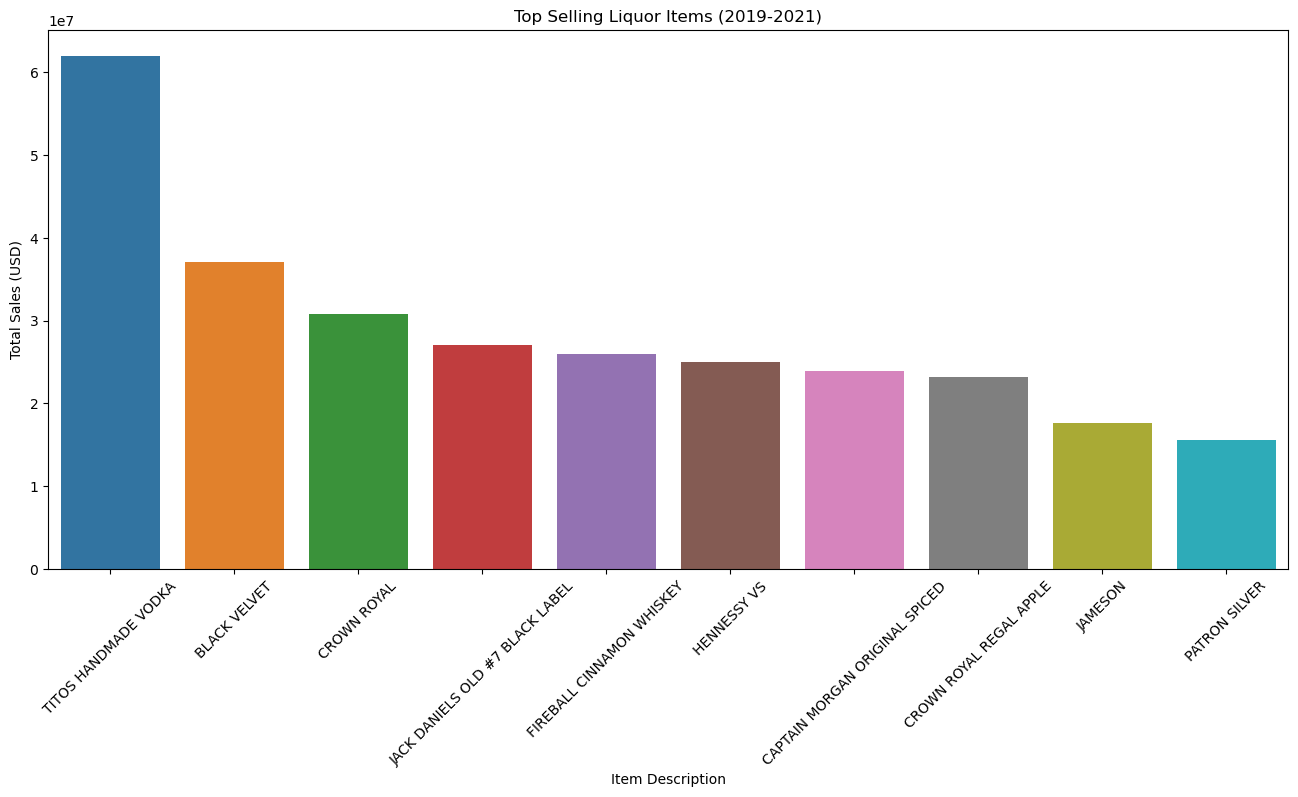

In [18]:
# Top-Selling Items by Sales Dollars
top_items_sales = df.groupby('item_description')['sale_dollars'].sum().nlargest(10).reset_index()
plt.figure(figsize=(16, 7))
sns.barplot(x='item_description', y='sale_dollars', data=top_items_sales)
plt.xlabel('Item Description')
plt.ylabel('Total Sales (USD)')
plt.title('Top Selling Liquor Items (2019-2021)')
plt.xticks(rotation=45)
plt.show()

## Insights
-
From the plot, we can see that Titos Vodkas were the best-selling category with Black Velvet and Crown Royal coming in second and third place

# 3. Trend of the number of bottles sold between 2019 to 2021?

Text(0.5, 1.0, 'Average bottles sold per month')

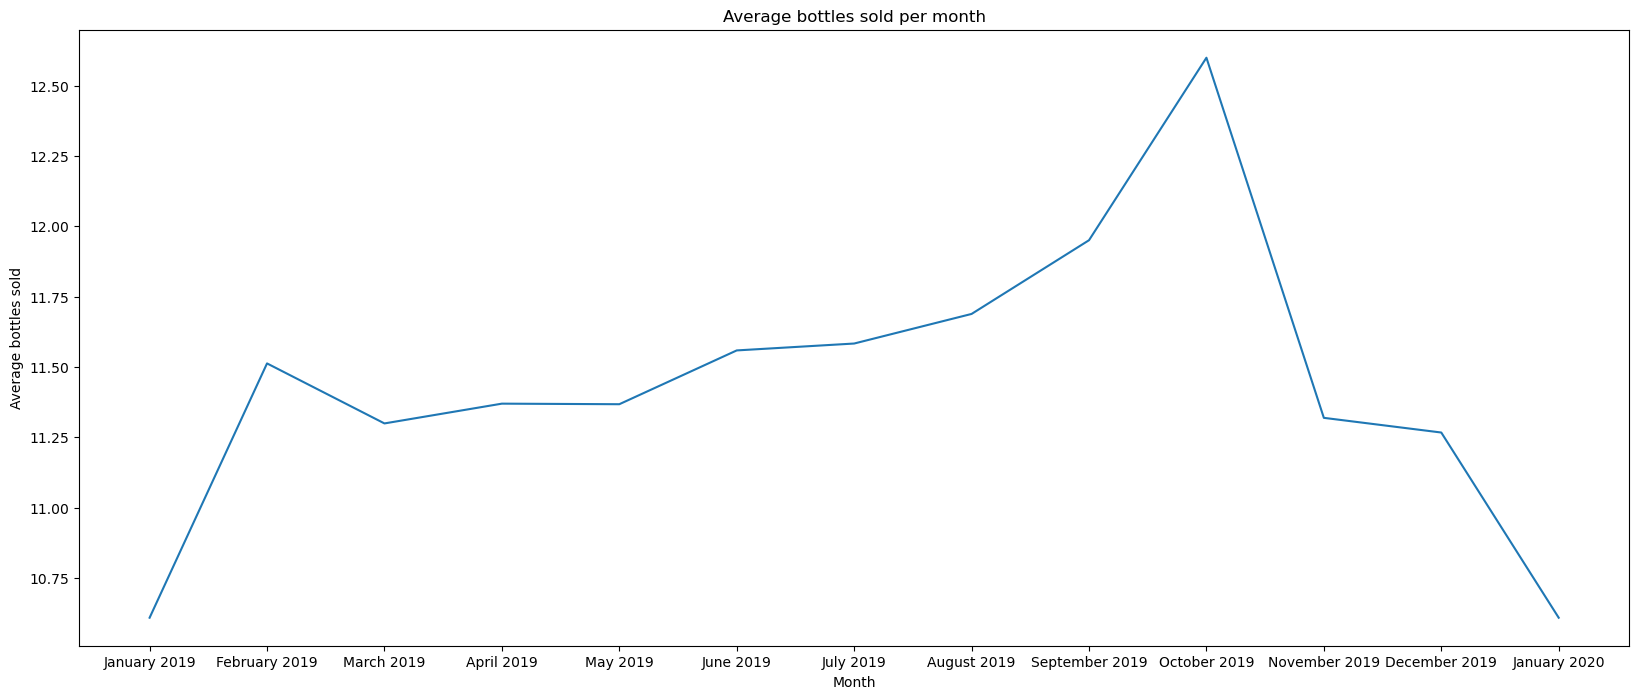

In [19]:
month = np.append(np.arange(1,13,1), 1, axis=None)
year = np.append(np.array([2019]*12), 2020, axis = None)
months = ["","January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mean_sale = []
sale_month = []


for i in range(13):
    mask_date = (df['date'].dt.month == pd.to_datetime(str(f"{year[i]}-{month[i]}")).month)
    mean_bottles_sale = df[mask_date]['bottles_sold'].mean()
    mean_sale.append(mean_bottles_sale)
    sale_month.append(str(f"{months[month[i]]} {year[i]}"))
plt.figure(figsize=(20,8))
plt.plot(sale_month, mean_sale)
plt.xlabel("Month")
plt.ylabel("Average bottles sold")
plt.title("Average bottles sold per month")

## Insights
-
Considering the specific dates from January 2019 to January 2020 we can see a rise in sales numbers around holiday seasons such as Christmas and New years

In [20]:
#df[mask][['date','bottles_sold','city']]

# 4. Revenue being drawn

In [21]:
df['month'] = df['date'].dt.to_period('M')
sales_per_month = df.groupby(['month'])['sale_dollars'].sum()

Text(0, 0.5, 'Sales Price (in Millions)')

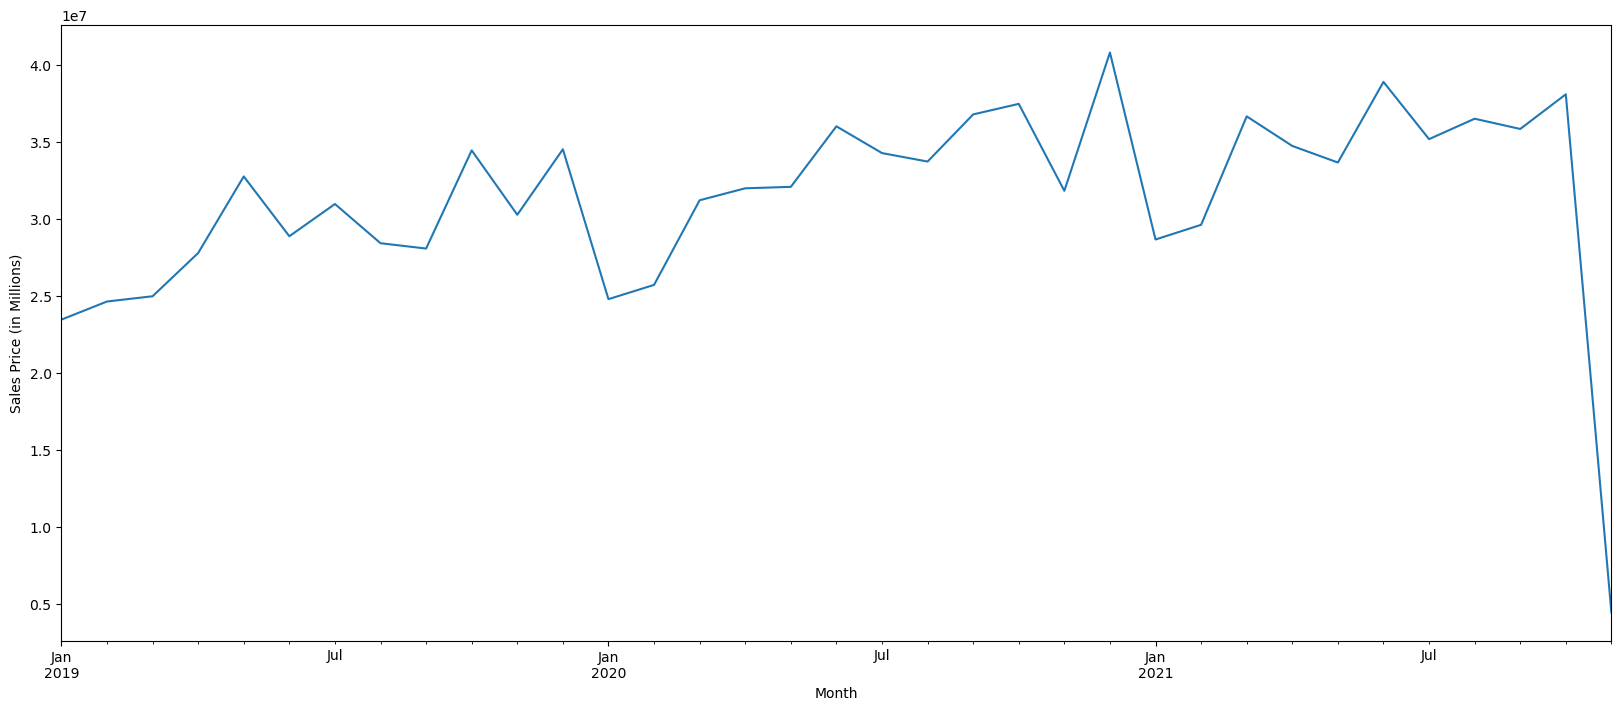

In [22]:
plt.figure(figsize=(20,8))
sales_per_month.plot()
plt.xlabel("Month")
plt.ylabel("Sales Price (in Millions)")

In [23]:
revenue_per_category = df.groupby('category_name')['sale_dollars'].sum()
revenue_per_category = revenue_per_category.sort_values(ascending = False)
print(f"The product with the most revenue is {revenue_per_category.index[0]} with a total revenue of {revenue_per_category[0].astype(int)} USD")

The product with the most revenue is AMERICAN VODKAS with a total revenue of 161021645 USD


C:\Users\Varun\AppData\Local\Temp\ipykernel_16812\2211366032.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The product with the most revenue is {revenue_per_category.index[0]} with a total revenue of {revenue_per_category[0].astype(int)} USD")


# 5. Stores and orders

In [24]:
stores_with_most_order = df.groupby('store_name').size().reset_index().rename(columns={0:"Number of orders"}).sort_values(by="Number of orders", ascending=False)
stores_with_most_order

,store_name,Number of orders
1059,HY-VEE #3 / BDI / DES MOINES,50889
680,CENTRAL CITY 2,46668
681,"CENTRAL CITY LIQUOR, INC.",45979
1159,HY-VEE FOOD STORE / CEDAR FALLS,42298
1223,HY-VEE WINE AND SPIRITS / BETTENDORF,37157
...,...,...
1690,ROCK RIVER DISTILLATION COMPANY,6
34,ARTISAN GRAIN DISTILLERY,4
1253,IOWA LEGENDARY RYE,4
1600,PARADISE DISTILLING COMPANY,2


In [25]:
print(f"{df['store_name'].nunique()} different stores ordered the liquor.")
print(f"The store with the most number of order is {stores_with_most_order.iloc[0]['store_name']} with a total order of {stores_with_most_order.iloc[0]['Number of orders']}.")

2126 different stores ordered the liquor.
The store with the most number of order is HY-VEE #3 / BDI / DES MOINES with a total order of 50889.


# 6. Seasonality analysis

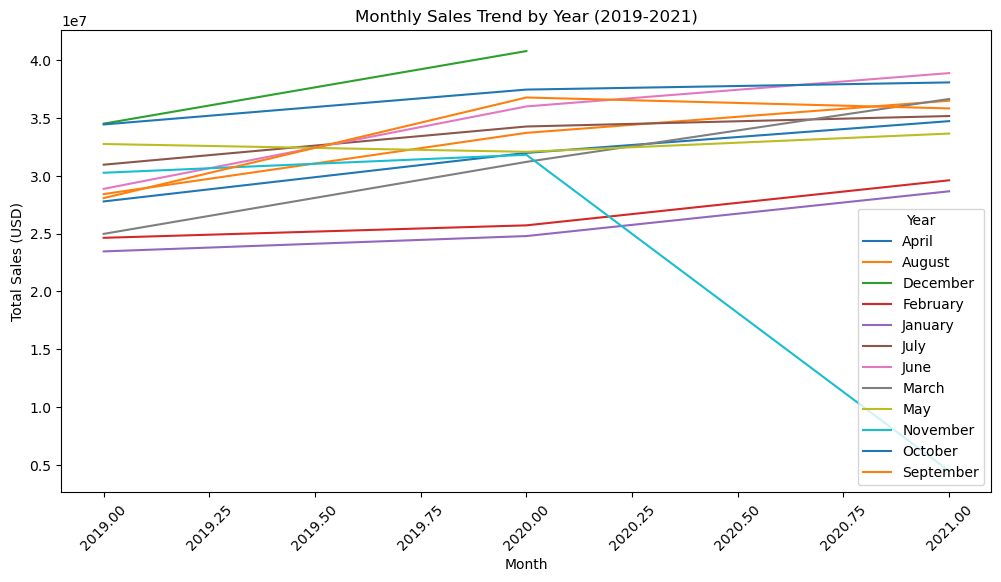

In [26]:
df['Month'] = pd.to_datetime(df['date']).dt.month_name()

monthly_sales = df.groupby(['Year', 'Month'])['sale_dollars'].sum().unstack()
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Sales Trend by Year (2019-2021)')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()


## Weekly Breakdown

Correlation between bottles sold and day of week: -0.005434202107082589


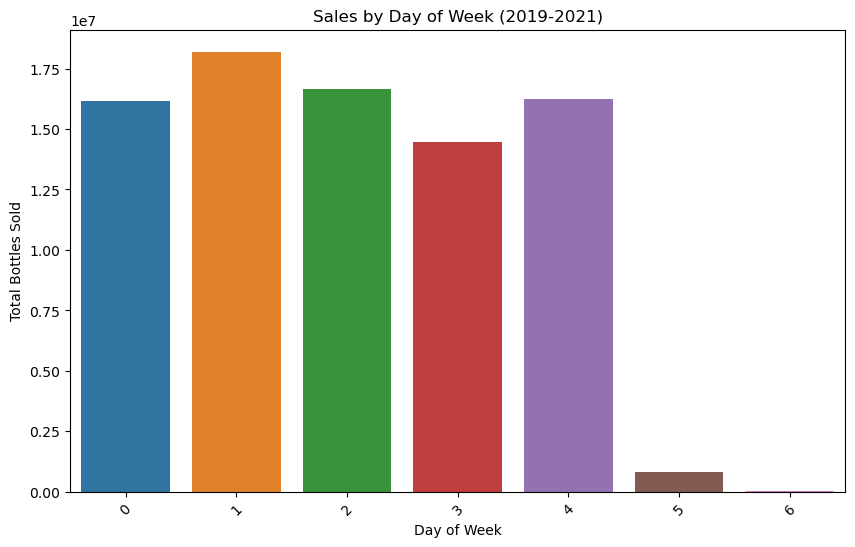

In [27]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek  # Extract day of week


correlation_day_week = df['bottles_sold'].corr(df['day_of_week'])
print("Correlation between bottles sold and day of week:", correlation_day_week)

day_of_week_sales = df.groupby('day_of_week')['bottles_sold'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='bottles_sold', data=day_of_week_sales)
plt.xlabel('Day of Week')  # 0: Monday, 6: Sunday
plt.ylabel('Total Bottles Sold')
plt.title('Sales by Day of Week (2019-2021)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Monthly Breakdown

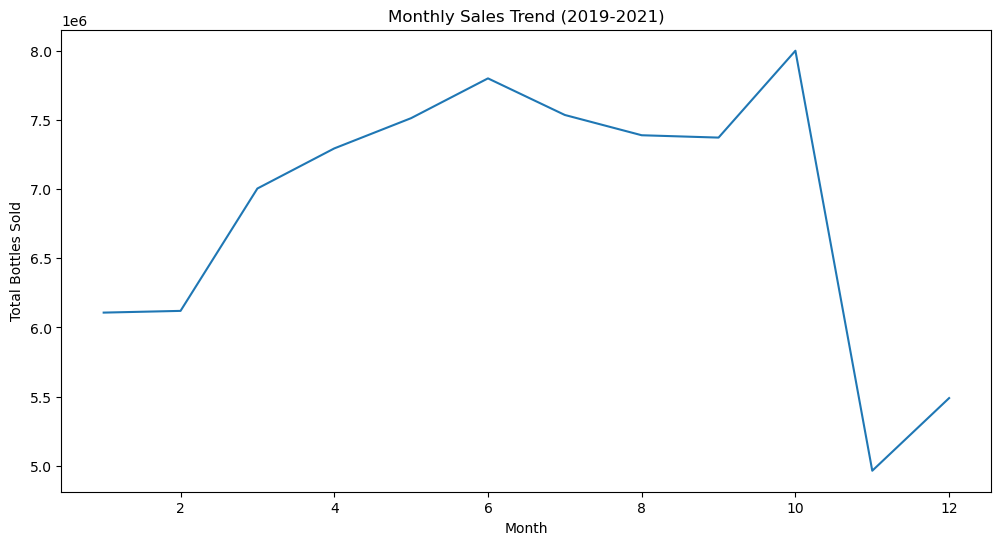

In [31]:
# Seasonality Analysis (Monthly Breakdown)
df['month'] = pd.to_datetime(df['date']).dt.month  # Extract month

monthly_sales = df.groupby('month')['bottles_sold'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['bottles_sold'])
plt.xlabel('Month')
plt.ylabel('Total Bottles Sold')
plt.title('Monthly Sales Trend (2019-2021)')
plt.show()

# 7. Holiday Impact Analysis

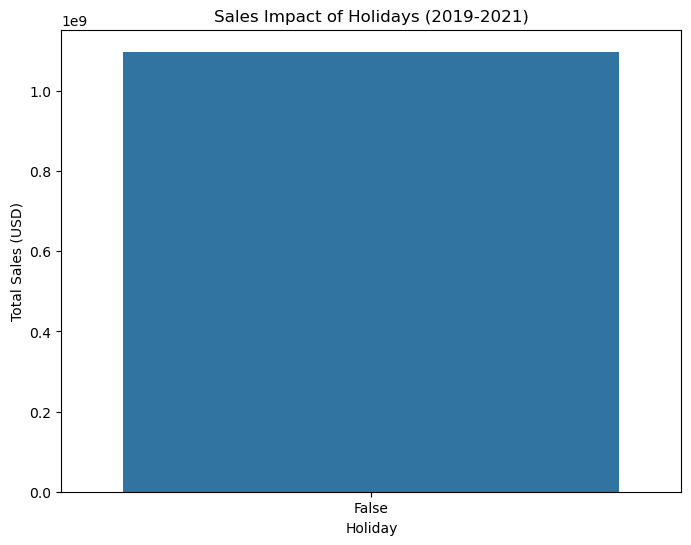

In [32]:
# Assuming a new binary feature "holiday" is created (0 - non-holiday, 1 - holiday)
holiday_sales = df.groupby('holiday')['sale_dollars'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='sale_dollars', data=holiday_sales)
plt.xlabel('Holiday')
plt.ylabel('Total Sales (USD)')
plt.title('Sales Impact of Holidays (2019-2021)')
plt.xticks(rotation=0)  # Display holiday labels horizontally
plt.show()

# 8. Consumption-based on Season

<Axes: xlabel='date'>

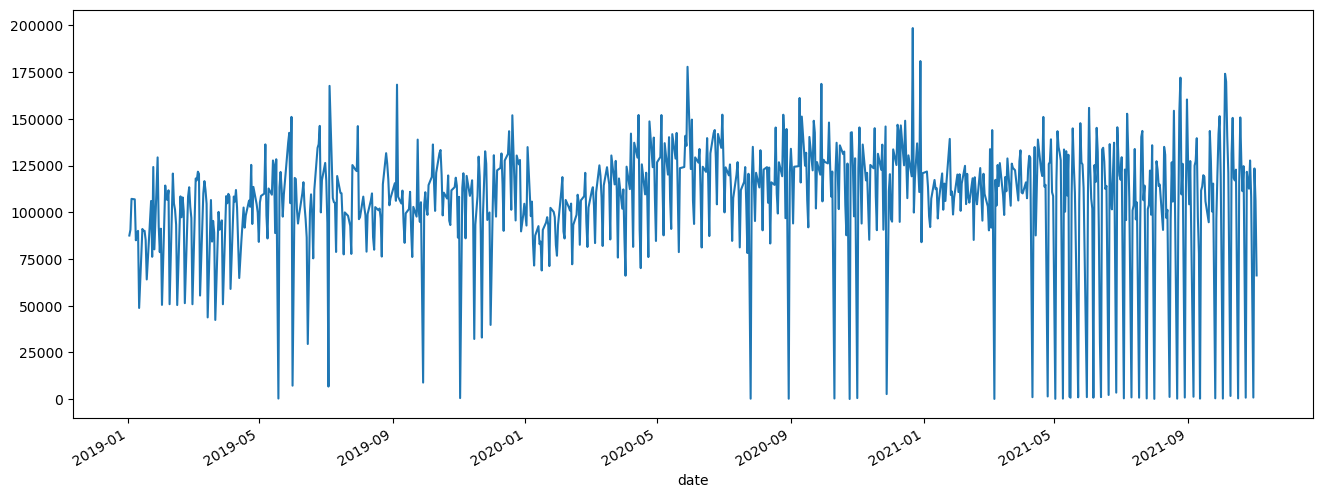

In [33]:
bottles_sold_per_day = df.groupby(['date'])['bottles_sold'].sum()
bottles_sold_per_day.plot(figsize=(16,6))

## The Augmented Dickey-Fuller (ADF) Test:
* The ADF test is a statistical test used to determine whether a time series is stationary.
* A time series is considered stationary if its mean, variance, and autocorrelation (dependence on past values) are constant over time.
* Stationarity is a crucial assumption for many time series forecasting models, including SARIMA.

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [37]:
adf_test(bottles_sold_per_day)

ADF Statistics: -4.112719120962317
p- value: 0.0009226867505194483
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


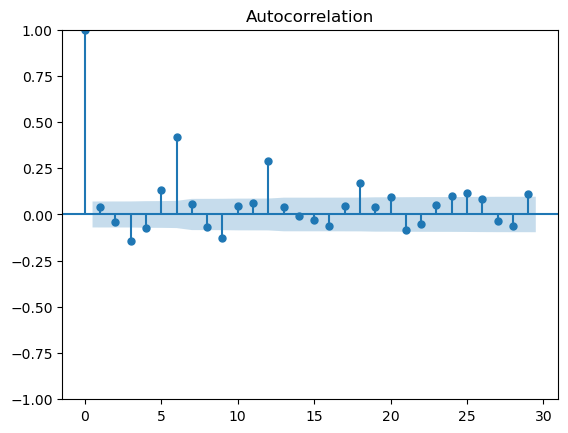

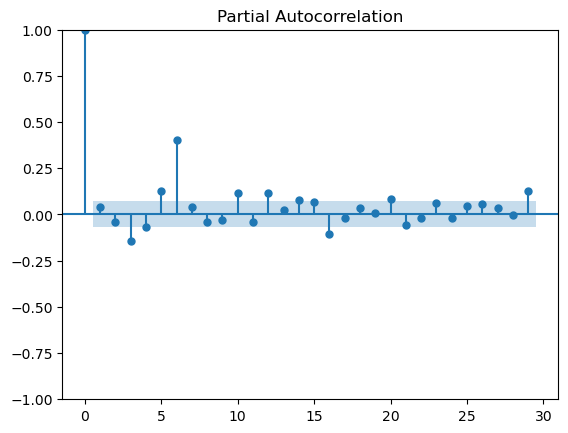

In [38]:
acf = plot_acf(bottles_sold_per_day)
pacf = plot_pacf(bottles_sold_per_day)

## Insghts
* Since the p-value (0.00026327) is less than 0.05, we can reject the null hypothesis. This means that there's strong evidence that the bottles_sold_per_day data has no unit root and is therefore stationary.

## Model Building

In [39]:
df.dropna(inplace=True)

In [40]:
#checking the shape of data after misssing vlaues
df.shape

(6465561, 31)

### Taking a smaller sample of 100,000 over the 6M+ rows

In [42]:
df = df.sample(n=100000, random_state=42)

In [43]:
df.head()

,invoice_item_number,date,store_number,store_name,store_address,city,zip_code,store_location,county_number,county,...,sale_dollars,volume_sold_liters,volume_sold_gallons,Year,month,Month,day_of_week,holiday,day,weekday
5602712,INV-35466900048,2021-03-31,6097,BREW OIL #51 / SANBORN,101 W 7TH ST,SANBORN,51248.0,POINT (-95.656064 43.186035000000004),71.0,O'BRIEN,...,23.22,0.15,0.03,2021,3,March,2,False,31,2
6087659,INV-37237000067,2021-06-05,2543,HY-VEE FOOD STORE #1 / OTTUMWA,1025 NORTH QUINCY AVE,OTTUMWA,52501.0,POINT (-92.438463 41.01558),90.0,WAPELLO,...,67.50,5.25,1.38,2021,6,June,5,False,5,5
3329868,INV-27396600081,2020-05-20,2585,HY-VEE WINE AND SPIRITS / ALGONA,1502 HIGHWAY 169 N SUITE 1,ALGONA,50511.0,POINT (-94.235955 43.08091),55.0,KOSSUTH,...,40.77,2.25,0.59,2020,5,May,2,False,20,2
3176422,INV-26937600109,2020-04-30,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPIDS,4035 MT VERNON RD SE,CEDAR RAPIDS,52403.0,POINT (-91.60978 41.976835),57.0,LINN,...,46.49,0.75,0.19,2020,4,April,3,False,30,3
6801547,INV-40043000043,2021-09-13,2512,HY-VEE WINE AND SPIRITS / IOWA CITY,1720 WATERFRONT DR,IOWA CITY,52240.0,POINT (-91.53046300000001 41.642764),52.0,JOHNSON,...,1133.40,60.00,15.85,2021,9,September,0,False,13,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Perform Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['category_name'] = label_encoder.fit_transform(df['category_name'])
df['vendor_name'] = label_encoder.fit_transform(df['vendor_name'])
df['store_name'] = label_encoder.fit_transform(df['store_name'])
df['city'] = label_encoder.fit_transform(df['city'])
df['county'] = label_encoder.fit_transform(df['county'])

## Feature Selection

In [47]:
# Selecting features and target variable
selected_columns=['store_number', 'store_name', 'city', 'county', 'category', 'vendor_number', 'pack', 'bottle_volume_ml', 'state_bottle_cost']

X = df[selected_columns]
y = df['sale_dollars']

In [48]:
X.head()

,store_number,store_name,city,county,category,vendor_number,pack,bottle_volume_ml,state_bottle_cost
5602712,6097,84,344,70,1081400.0,55.0,10,50,5.16
6087659,2543,1045,303,89,1031100.0,619.0,6,1750,15.00
3329868,2585,1115,10,54,1062500.0,260.0,6,750,9.06
3176422,2588,1037,58,56,1052100.0,420.0,12,750,30.99
6801547,2512,1124,193,51,1011200.0,65.0,12,1000,13.00


In [50]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regression
1. Data Standardization: A standard scaler is used to normalize the features in the training and testing data (X_train_scaled, X_test_scaled). This improves the performance of some regression models.
2. Linear Regression: A linear regression model is trained to learn a linear relationship between the features and the target variable.
3. SVM Regression: An SVM regressor model is trained to find a hyperplane that best separates the data points while minimizing prediction error.
4. KNN Regression: A KNN regressor model is trained to predict values by considering the average of the target variable for the k nearest neighbors in the training data.
5. Evaluation (Mean Squared Error): Mean squared error (MSE) is calculated for each model's predictions on the testing data to assess their accuracy. Lower MSE indicates a better fit.

In [51]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Initialize StandardScaler
scaler = StandardScaler()
# Initialize Linear Regression model
linear_regressor = LinearRegression()

# Fit Linear Regression model
linear_regressor.fit(X_train_scaled, y_train)

# Predict using Linear Regression model
y_pred_linear = linear_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)


# Initialize Support Vector Machine Regressor model
svm_regressor = SVR()

# Fit SVM Regressor model
svm_regressor.fit(X_train_scaled, y_train)

# Predict using SVM Regressor model
y_pred_svm = svm_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error for SVM Regressor
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("SVM Regressor Mean Squared Error:", mse_svm)

# Initialize K-Nearest Neighbors Regressor model
knn_regressor = KNeighborsRegressor()

# Fit K-Nearest Neighbors Regressor model
knn_regressor.fit(X_train_scaled, y_train)

# Predict using K-Nearest Neighbors Regressor model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error for K-Nearest Neighbors Regressor
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("K-Nearest Neighbors Regressor Mean Squared Error:", mse_knn)

Linear Regression Mean Squared Error: 187809.03071607268
SVM Regressor Mean Squared Error: 189214.48377939544
K-Nearest Neighbors Regressor Mean Squared Error: 186367.5532266772


## Evaluating Model Performance with R-Squared

In [52]:
from sklearn.metrics import r2_score

# Calculate R2 score for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression R2 Score:", r2_linear)

# Calculate R2 score for SVM Regressor
r2_svm = r2_score(y_test, y_pred_svm)
print("SVM Regressor R2 Score:", r2_svm)

# Calculate R2 score for K-Nearest Neighbors Regressor
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Regressor R2 Score:", r2_knn)

Linear Regression R2 Score: 0.027599401665085233
SVM Regressor R2 Score: 0.020322523686982064
K-Nearest Neighbors Regressor R2 Score: 0.0350627998192109


## Dumping Trained Models Into Pickle Files

In [54]:
import joblib

# Dump trained models
joblib.dump(linear_regressor, 'linear_regressor_model.pkl')
joblib.dump(svm_regressor, 'svm_regressor_model.pkl')
joblib.dump(knn_regressor, 'knn_regressor_model.pkl')


['knn_regressor_model.pkl']

## ARIMA 
### Understanding Daily Sales Data and Forecasting Future Sales,  ARIMA stands for AutoRegressive Integrated Moving Average. In simpler terms, it leverages historical sales trends to make educated guesses about upcoming sales.
- We build an ARIMA model to analyze the sales data. The specific settings (5, 1, 0) in the code are an example and may need adjustments based on your data.
- The model learns from past sales figures to identify trends and potential future sales behavior.
- We specify the number of days (30 in this case) for which we want to predict future sales.
- The model uses the learned patterns to generate forecasts for those upcoming days.

C:\Users\Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

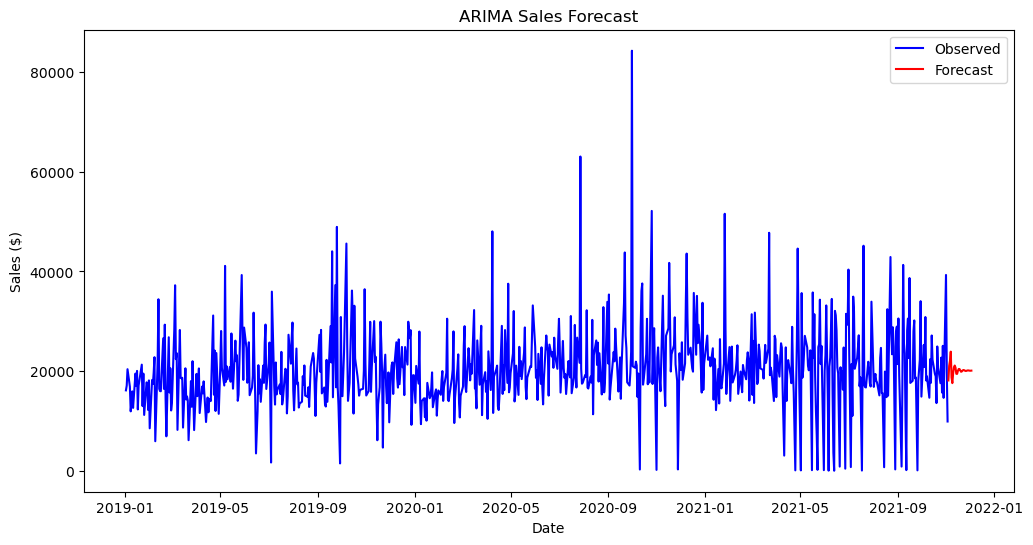

Mean Absolute Error (MAE): 5128.436340261865


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Group data by date and sum the 'sale_dollars' column to get total sales per day
sales_data = df.groupby('date')['sale_dollars'].sum()

# Ensure the index is a DatetimeIndex and set the frequency to 'D' (daily)
sales_data.index = pd.DatetimeIndex(sales_data.index).to_period('D').to_timestamp('D')

# Plot the sales data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data, label='Observed', color='blue')

# Fit ARIMA model
model = ARIMA(sales_data, order=(5,1,0)) # Example order, tune as needed
arima_result = model.fit()

# Forecast
forecast_steps = 30  # Number of steps to forecast
forecast_index = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast = arima_result.forecast(steps=forecast_steps)

# Plot the forecast
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('ARIMA Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

# Compute accuracy metrics
actual_sales = sales_data[-forecast_steps:]
mae = mean_absolute_error(actual_sales, forecast)

# Print accuracy metrics
print("Mean Absolute Error (MAE):", mae)

## LSTM
### Predicting Future Values with LSTM Networks.LSTMs are well-suited for analyzing sequential data like time series, where past values can influence future ones.

In [56]:
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape input data for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Fit LSTM model
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=2)

# Predictions
train_predict = model.predict(X_train_lstm)
test_predict = model.predict(X_test_lstm)

# Calculate R2 score for train and test predictions
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print("R2 score for train predictions:", r2_train)
print("R2 score for test predictions:", r2_test)

C:\Users\Varun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2500/2500 - 10s - 4ms/step - loss: 290882.5938
Epoch 2/100
2500/2500 - 7s - 3ms/step - loss: 281943.5625
Epoch 3/100
2500/2500 - 7s - 3ms/step - loss: 280613.4062
Epoch 4/100
2500/2500 - 9s - 4ms/step - loss: 278183.5625
Epoch 5/100
2500/2500 - 8s - 3ms/step - loss: 275734.5000
Epoch 6/100
2500/2500 - 8s - 3ms/step - loss: 274468.6562
Epoch 7/100
2500/2500 - 7s - 3ms/step - loss: 273645.0312
Epoch 8/100
2500/2500 - 7s - 3ms/step - loss: 272989.5312
Epoch 9/100
2500/2500 - 7s - 3ms/step - loss: 272424.3125
Epoch 10/100
2500/2500 - 8s - 3ms/step - loss: 271893.6250
Epoch 11/100
2500/2500 - 8s - 3ms/step - loss: 271404.0938
Epoch 12/100
2500/2500 - 8s - 3ms/step - loss: 270994.3438
Epoch 13/100
2500/2500 - 8s - 3ms/step - loss: 270631.4688
Epoch 14/100
2500/2500 - 8s - 3ms/step - loss: 270047.6250
Epoch 15/100
2500/2500 - 7s - 3ms/step - loss: 269439.9688
Epoch 16/100
2500/2500 - 8s - 3ms/step - loss: 268932.5312
Epoch 17/100
2500/2500 - 7s - 3ms/step - loss: 268341.5000
Epoch

- This log provides insights into the training process of an LSTM model. While the loss seems to decrease over epochs, the low R-squared scores on both training and testing data suggest there's room for improvement in the model's performance. 

## Conclusion
- K-Nearest Neighbors Regressor: 0.0350627998192109 (Best)
- Linear Regression: 0.027599401665085233
- SVM Regressor: 0.020322523686982064 (Worst)

This indicates that the K-Nearest Neighbors Regressor captured the underlying relationship between the features and target variable better than the other two models on this specific dataset. It achieved the highest R-squared score, which means its predictions fit the actual data the closest. In this case, the K-Nearest Neighbors Regressor performed slightly better than the other two models based on their R-squared scores.